# My analysis on disease outbreak in Nigeria prior to Covid 19
Here we want to find out the most rampant disease and the most victims by states

In [1]:
# First I import the neccessary python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import the dataset using pandas
disease = pd.read_excel('/home/utee/Documents/dataset.xlsx')

In [3]:
# Let's check info about the dataset
# The dataset contains 15 columns and 284,484 rows
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              284484 non-null  int64 
 1   surname         284484 non-null  object
 2   firstname       284484 non-null  object
 3   middlename      284484 non-null  object
 4   gender          284484 non-null  object
 5   state           284484 non-null  object
 6   settlement      284484 non-null  object
 7   report_date     284484 non-null  object
 8   report_year     284484 non-null  int64 
 9   age             284484 non-null  int64 
 10  age_str         284484 non-null  object
 11  date_of_birth   284484 non-null  object
 12  disease         284484 non-null  object
 13  health_status   284484 non-null  object
 14  report_outcome  284484 non-null  object
dtypes: int64(3), object(12)
memory usage: 32.6+ MB


In [4]:
# Now have an idea of the diseases in our dataset, Let's check for missing values
disease.isna().any()

id                False
surname           False
firstname         False
middlename        False
gender            False
state             False
settlement        False
report_date       False
report_year       False
age               False
age_str           False
date_of_birth     False
disease           False
health_status     False
report_outcome    False
dtype: bool

In [5]:
# We have no missing value, that's a good sign
# First, let me clean the dataset by dropping dulicate rows using the unique id column
disease = disease.drop_duplicates('id')

,id,surname,firstname,middlename,gender,state,settlement,report_date,report_year,age,age_str,date_of_birth,disease,health_status,report_outcome
0,1,Solade,Grace,Solape,Female,Rivers,Rural,2018-05-15 00:00:00,2018,32,32 years,1986-01-17 00:00:00,Cholera,alive,confirmed
1,2,Eneche,Kure,Balogun,Male,Ebonyi,Rural,2017-02-28 00:00:00,2017,32,32 years,1985-09-01 00:00:00,Marburg Virus,Alive,Confirmed
2,3,Sanusi,Adaugo,Katerine,Female,Ogun,Urban,2012-03-02 00:00:00,2012,24,24 years,1988-05-01 00:00:00,Marburg Virus,Dead,Not Confirmed
3,4,Sowore,Mooslemat,Ifedayo,Female,Ondo,Rural,2010-05-21 00:00:00,2010,63,63 years,1947-05-24 00:00:00,Measles,Alive,Not Confirmed
4,5,Abdusalam,Yusuf,Okafor,Male,Oyo,Urban,2017-08-28 00:00:00,2017,9,9 years,2008-01-07 00:00:00,Rubella Mars,Alive,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,288418,Mukthar,Alimat,Ajibewa,Female,Cross River,Rural,2012-08-24 00:00:00,2012,67,67 years,1945-07-10 00:00:00,Ebola,Dead,Confirmed
284480,288419,Akenzua,Deborah,Rofeeqat,Female,Kwara,Urban,2009-01-19 00:00:00,2009,64,64 years,1945-01-27 00:00:00,Ebola,Dead,Confirmed
284481,288420,Isa,Deborah,Tofunmi,Female,Katsina,Rural,2010-06-10 00:00:00,2010,33,33 years,1977-10-03 00:00:00,Malaria,Alive,Confirmed
284482,288421,Uba,Ismail,Akpabio,Male,Jigawa,Rural,2016-01-11 00:00:00,2016,18,18 years,1998-05-07 00:00:00,Malaria,Dead,Not Confirmed


In [6]:
# Now let's preview the dataset
disease.head()

,id,surname,firstname,middlename,gender,state,settlement,report_date,report_year,age,age_str,date_of_birth,disease,health_status,report_outcome
0,1,Solade,Grace,Solape,Female,Rivers,Rural,2018-05-15 00:00:00,2018,32,32 years,1986-01-17 00:00:00,Cholera,alive,confirmed
1,2,Eneche,Kure,Balogun,Male,Ebonyi,Rural,2017-02-28 00:00:00,2017,32,32 years,1985-09-01 00:00:00,Marburg Virus,Alive,Confirmed
2,3,Sanusi,Adaugo,Katerine,Female,Ogun,Urban,2012-03-02 00:00:00,2012,24,24 years,1988-05-01 00:00:00,Marburg Virus,Dead,Not Confirmed
3,4,Sowore,Mooslemat,Ifedayo,Female,Ondo,Rural,2010-05-21 00:00:00,2010,63,63 years,1947-05-24 00:00:00,Measles,Alive,Not Confirmed
4,5,Abdusalam,Yusuf,Okafor,Male,Oyo,Urban,2017-08-28 00:00:00,2017,9,9 years,2008-01-07 00:00:00,Rubella Mars,Alive,Confirmed


In [7]:
# Now let's explore our dataset. First let's see the type of diseases involved in our dataset
disease.disease.unique()

array(['Cholera', 'Marburg Virus', 'Measles', 'Rubella Mars', 'Ebola',
       'Yellow Fever', 'Diarrhoea', 'Meningitis', 'Malaria',
       'Viral Haemmorrhaphic Fever'], dtype=object)

In [8]:
# It seems there's some error in the health status column, let me echeck this out
disease['health_status'].unique()

array(['alive', 'Alive', 'Dead'], dtype=object)

In [9]:
# There are some irregularities in the health_status column
# Instead of Alive and Dead, there's an extra duplicate category 'alive'
# We'll need to fix this by merging with 'Alive'

disease['health_status'] = disease.health_status.replace('alive', 'Alive')

In [10]:
# It is much better now, we have just 'Alive' and 'Dead'

disease.health_status.unique()

array(['Alive', 'Dead'], dtype=object)

<AxesSubplot:xlabel='state'>

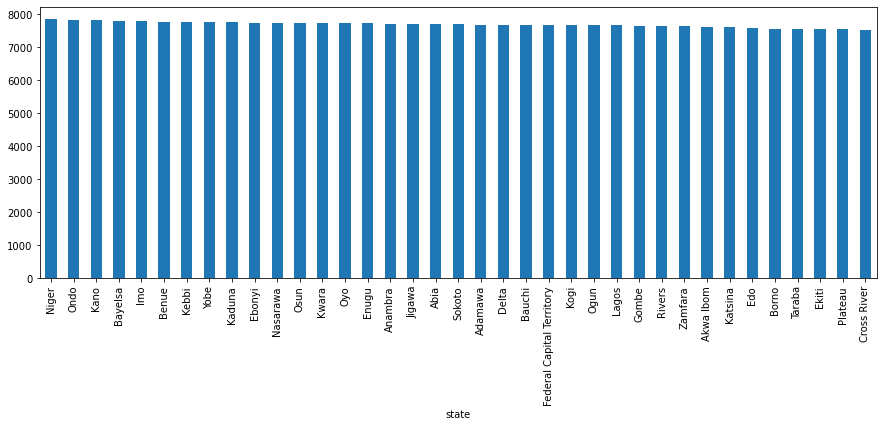

In [11]:
# Now, let's see the number of diseases by state
disease.groupby('state')['disease'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5))

<AxesSubplot:xlabel='disease'>

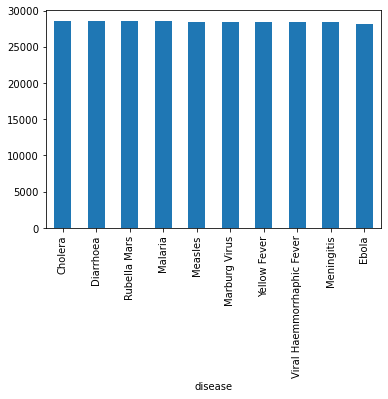

In [12]:
# Let's check the disease with the highest number of cases
disease.groupby('disease')['disease'].count().sort_values(ascending=False).plot(kind='bar')

In [13]:
# Let's see how each state is affected by these diseases
disease.groupby('state')['disease'].count().sort_values()

state
Cross River                  7524
Plateau                      7545
Ekiti                        7560
Taraba                       7560
Borno                        7564
Edo                          7596
Katsina                      7599
Akwa Ibom                    7621
Zamfara                      7632
Rivers                       7642
Gombe                        7657
Lagos                        7659
Ogun                         7661
Kogi                         7662
Federal Capital Territory    7663
Bauchi                       7665
Delta                        7678
Adamawa                      7688
Sokoto                       7691
Abia                         7697
Jigawa                       7704
Anambra                      7710
Enugu                        7722
Oyo                          7724
Kwara                        7726
Osun                         7726
Nasarawa                     7728
Ebonyi                       7747
Kaduna                       7754
Yobe    

<AxesSubplot:xlabel='state,health_status'>

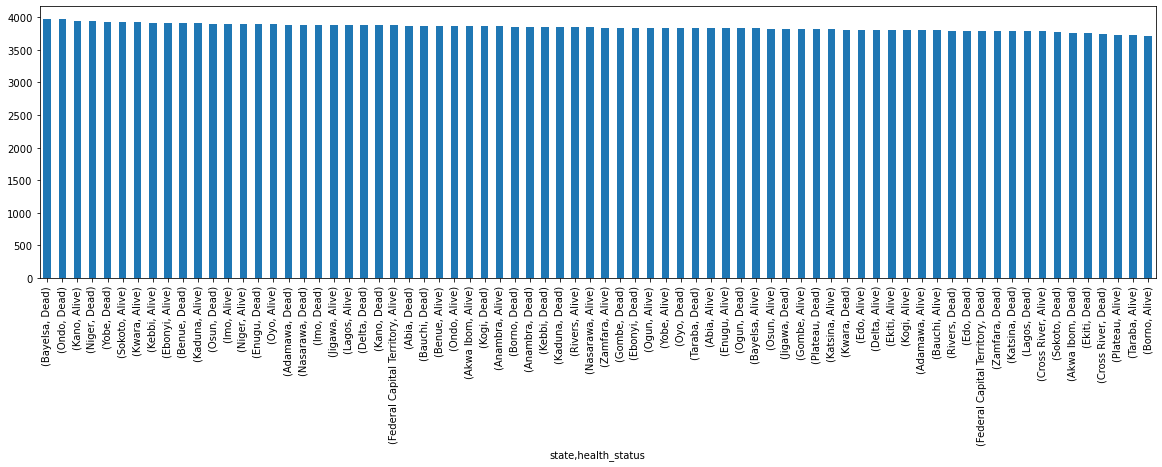

In [14]:
# We have discovered the state with the highest disease count
# Now let's see each state with fatalities and survivors
disease.groupby(['state','health_status'])['disease'].count().sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='disease'>

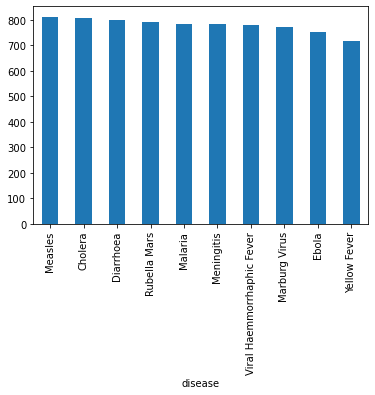

In [15]:
# It appears that Bayelsa state has the most cases that ended in fatalities
# Now let's dig deeper and find out which sickness is troubling the state 
disease[disease['state'] == 'Bayelsa'].groupby('disease')['disease'].count().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='disease,health_status'>

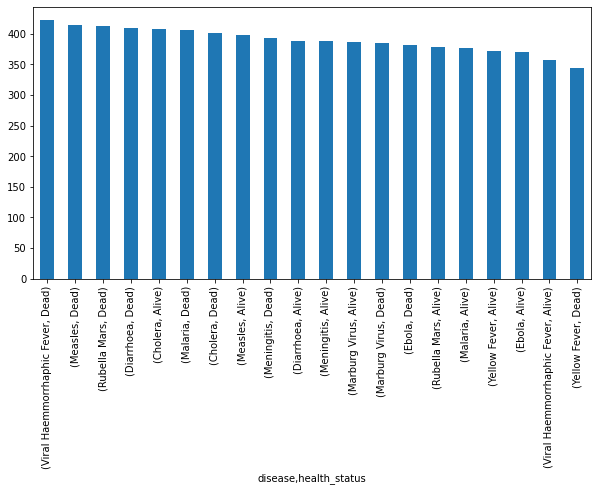

In [16]:
# It appears measles is the leading cause of ailment in the state.
# But could that be the cause of fatalities in the state? 
# Let's keep digging
disease[disease['state'] == 'Bayelsa'].groupby(['disease', 'health_status'])['disease'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

<AxesSubplot:title={'center':'Cause of death in Bayelsa State ranked by disease'}, xlabel='disease'>

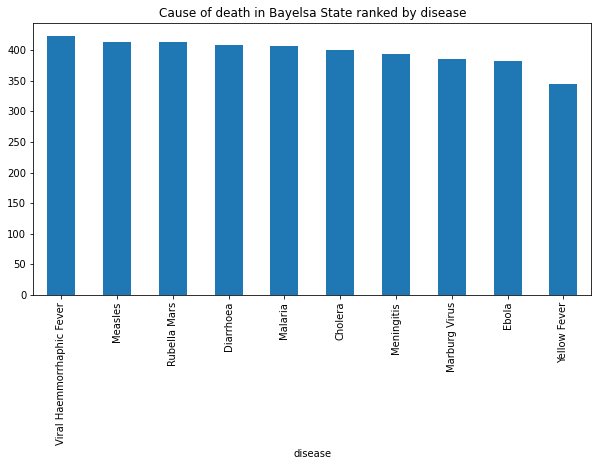

In [17]:
# Let's look further into these fatalities in Bayelsa State
# Here I filter the table by fatalities in Bayelsa state and measure the causating illness
disease[(disease['state']=='Bayelsa') & (disease['health_status']=='Dead')].groupby('disease')['disease'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title = 'Cause of death in Bayelsa State ranked by disease')

In [18]:
# Here we split our age column into age groups
# First, we check the age range, maximum and minimum age

disease['age'].max(), disease['age'].min()

(78, 0)

In [19]:
# Now we know our age range, let's group our age into groups: Young, Adult, Old...

disease['age_class'] = pd.cut(disease['age'], bins=[0, 20, 40, 60, 80], labels=['Young', 'Adult', 'Old', 'Very Old'])
disease['age_class'].head()

0       Adult
1       Adult
2       Adult
3    Very Old
4       Young
Name: age_class, dtype: category
Categories (4, object): ['Young' < 'Adult' < 'Old' < 'Very Old']

<AxesSubplot:xlabel='age_class'>

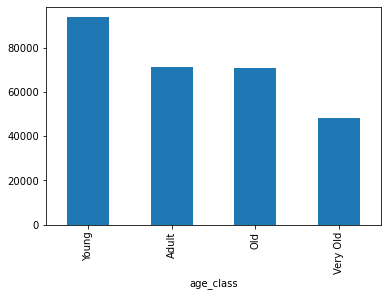

In [20]:
# First, let's view the age group most affected by these diseases across the country
disease.groupby('age_class')['disease'].count().plot(kind='bar')

<AxesSubplot:xlabel='age_class,disease'>

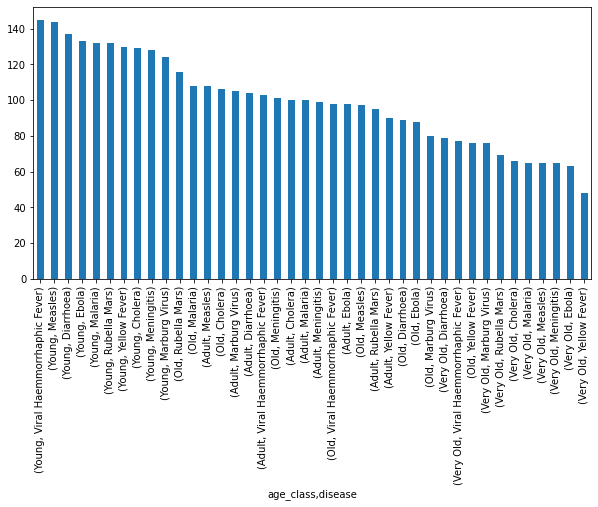

In [21]:
# Now let's see the age group with the most fatalities in Bayelsa state and the cause of death

disease[(disease['state'] == 'Bayelsa') & (disease['health_status']=='Dead')].groupby(['age_class', 'disease'])['disease'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

### SUMMARY

1. The most pervasive disease across all states is Cholera with over 28,000 cases.
2. Niger State has the highest number of casualties from these diseases.
3. Malaria has more survivors than fatalities while Diarrhoea and Cholera disease have more fatalities than survivors.
4. Among all states, Bayelsa State have had the most casualties which resulted in fatalities from these diseases.
5. The most common disease in Bayelsa State is measles
6. The disease with the leading cause of death in Bayelsa State is Haemorraphic fever followed by Measles and Rubella Mars.
7. Young people in Bayelsa state die from Viral Haemorraphic fever and are most affected
8. Young people in Nigeria between the ages of 0 to 20 are affected by these diseases the most